# Bachelor's
## Creation and training 3D CNN with RGB-dataset and Skeleton-dataset

In [ ]:
import os
import numpy as np
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import tensorflow as tf
from keras.optimizers import Adam
import random
from keras.layers import Input, Conv3D, MaxPooling3D, BatchNormalization, Activation, Flatten, Dense, Dropout, LSTM, GlobalAveragePooling3D
from keras.models import Model
from keras.regularizers import l2

In [ ]:
def shuffle_data(frames, classes):
  combined_data = list(zip(frames, classes))
  random.shuffle(combined_data)
  shuffled_frames, shuffled_classes = zip(*combined_data)
  return np.array(shuffled_frames), np.array(shuffled_classes)

### 3D CNN

In [ ]:
def CNN3D(input_shape, num_classes, power):
    # Вхідний шар
    inputs = Input(shape=input_shape)
    x = inputs

    # for i in range(power):
    #   x = Conv3D(filters=32 * 2**i, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    #   x = BatchNormalization()(x)
    #   x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Перший конволюційний блок
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Другий конволюційний блок
    x = Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Третій конволюційний блок
    x = Conv3D(filters=128, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Четвертий конволюційний блок
    x = Conv3D(filters=256, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # # Пятий конволюційний блок
    # x = Conv3D(filters=512, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Згортковий шар
    x = Flatten()(x)

    # Повнозв'язаний шар
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    # x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Вихідний шар
    outputs = Dense(num_classes, activation='softmax')(x)

    # Модель
    model = Model(inputs=inputs, outputs=outputs)

    return model

num_classes = 7

skeleton32_cnn3d = CNN3D((32, 135, 240, 3), num_classes, 5)
skeleton32_cnn3d.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 135, 240, 3   0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 32, 135, 240, 32   2624      
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 32, 135, 240, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 16, 67, 120, 32)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 16, 67, 120, 64)   55360 

### Load dataset

In [ ]:
drive.mount('/content/drive')

skeleton32_train_frames = np.load('/content/drive/My Drive/skeleton32_train_frames.npy')
skeleton32_train_classes = np.load('/content/drive/My Drive/skeleton32_train_classes.npy')

skeleton32_test_frames = np.load('/content/drive/My Drive/skeleton32_test_frames.npy')
skeleton32_test_classes = np.load('/content/drive/My Drive/skeleton32_test_classes.npy')

skeleton32_val_frames = np.load('/content/drive/My Drive/skeleton32_val_frames.npy')
skeleton32_val_classes = np.load('/content/drive/My Drive/skeleton32_val_classes.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/rgb32_resnet3d.h5')

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 135, 240, 3   0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 32, 135, 240, 32   2624      
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 32, 135, 240, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 16, 67, 120, 32)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 16, 67, 120, 64)   55360 

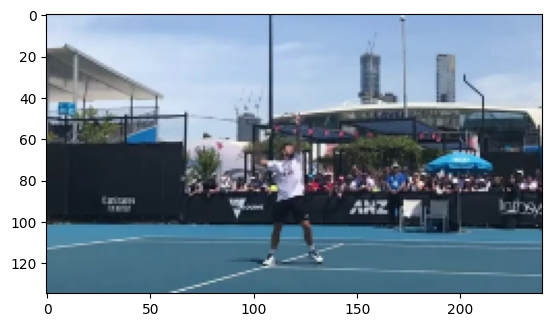

In [ ]:
plt.imshow(skeleton32_train_frames[183][3])

In [ ]:
skeleton32_train_frames, skeleton32_train_classes = shuffle_data(skeleton32_train_frames, skeleton32_train_classes)
skeleton32_test_frames, skeleton32_test_classes = shuffle_data(skeleton32_test_frames, skeleton32_test_classes)
skeleton32_val_frames, skeleton32_val_classes = shuffle_data(skeleton32_val_frames, skeleton32_val_classes)

In [ ]:
print(skeleton32_train_frames.shape, skeleton32_test_frames.shape, skeleton32_val_frames.shape)
print(skeleton32_train_classes.shape, skeleton32_test_classes.shape, skeleton32_val_classes.shape)

(210, 32, 135, 240, 3) (70, 32, 135, 240, 3) (91, 32, 135, 240, 3)
(210,) (70,) (91,)


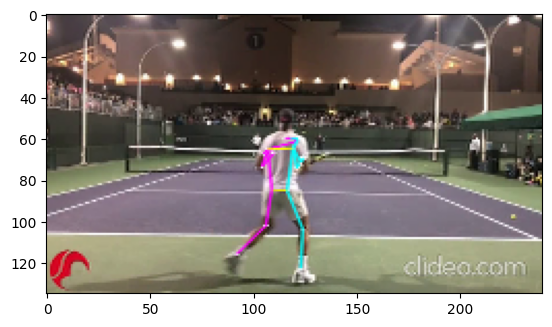

In [ ]:
plt.imshow(skeleton32_train_frames[145][5])

In [ ]:
skeleton32_val_classes[:20]

array([1, 1, 2, 1, 6, 3, 1, 3, 0, 0, 3, 1, 5, 1, 2, 5, 4, 3, 5, 6],
      dtype=int32)

In [ ]:
from keras.utils import to_categorical

# Перетворення міток класів в one-hot encoding
skeleton32_train_classes = to_categorical(skeleton32_train_classes)
skeleton32_test_classes = to_categorical(skeleton32_test_classes)
skeleton32_val_classes = to_categorical(skeleton32_val_classes)

In [ ]:
skeleton32_train_classes[145]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.optimizers import Adam

skeleton32_cnn3d.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = skeleton32_cnn3d.fit(skeleton32_train_frames, skeleton32_train_classes, epochs=100, batch_size=8, validation_data=(skeleton32_val_frames, skeleton32_val_classes))

Epoch 1/100
27/27 [==============================] - 39s 869ms/step - loss: 1099.8149 - accuracy: 0.2524 - val_loss: 47452.8828 - val_accuracy: 0.1429
Epoch 2/100
27/27 [==============================] - 15s 567ms/step - loss: 1380.2855 - accuracy: 0.3810 - val_loss: 5787.4185 - val_accuracy: 0.0989
Epoch 3/100
27/27 [==============================] - 15s 544ms/step - loss: 1252.3657 - accuracy: 0.3762 - val_loss: 3431.4924 - val_accuracy: 0.1429
Epoch 4/100
27/27 [==============================] - 15s 544ms/step - loss: 877.4843 - accuracy: 0.5286 - val_loss: 1304.8988 - val_accuracy: 0.1538
Epoch 5/100
27/27 [==============================] - 15s 557ms/step - loss: 609.7046 - accuracy: 0.5762 - val_loss: 610.1870 - val_accuracy: 0.2198
Epoch 6/100
27/27 [==============================] - 15s 563ms/step - loss: 407.6903 - accuracy: 0.6286 - val_loss: 338.1465 - val_accuracy: 0.2308
Epoch 7/100
27/27 [==============================] - 15s 565ms/step - loss: 280.9685 - accuracy: 0.5619 

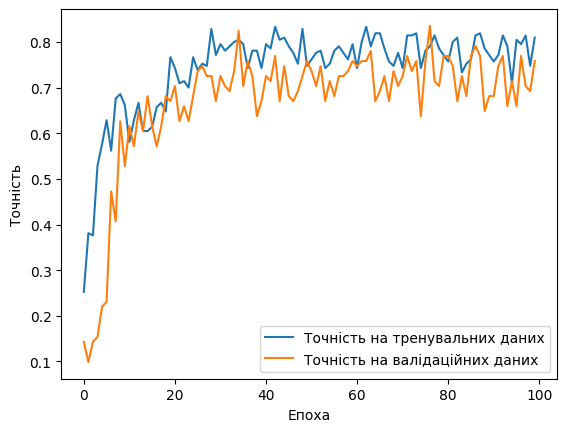

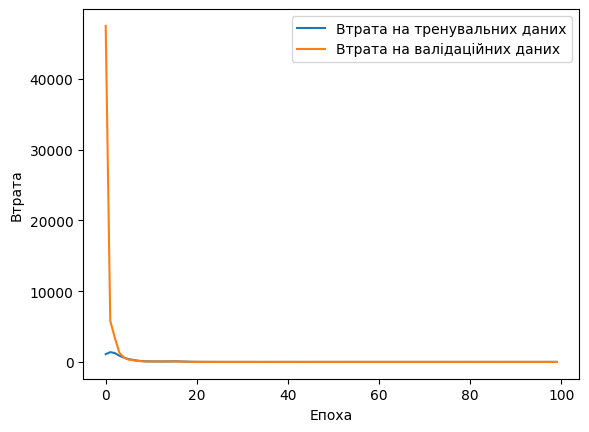

In [ ]:
import matplotlib.pyplot as plt

# Відображення графіка точності
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Відображення графіка втрати
plt.plot(history.history['loss'], label='Втрата на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрата на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Зробити передбачення на тренувальних і тестових даних
skeleton32_train_predictions = np.argmax(skeleton32_cnn3d.predict(skeleton32_train_frames, batch_size=8), axis=1)
skeleton32_test_predictions = np.argmax(skeleton32_cnn3d.predict(skeleton32_test_frames, batch_size=8), axis=1)
skeleton32_val_predictions = np.argmax(skeleton32_cnn3d.predict(skeleton32_val_frames, batch_size=8), axis=1)

# Отримати істинні мітки класів
skeleton32_train_true_labels = np.argmax(skeleton32_train_classes, axis=1)
skeleton32_test_true_labels = np.argmax(skeleton32_test_classes, axis=1)
skeleton32_val_true_labels = np.argmax(skeleton32_val_classes, axis=1)

# Побудувати матрицю плутанини для тренувальних і тестових даних
skeleton32_train_confusion_matrix = confusion_matrix(skeleton32_train_true_labels, skeleton32_train_predictions)
skeleton32_test_confusion_matrix = confusion_matrix(skeleton32_test_true_labels, skeleton32_test_predictions)
skeleton32_val_confusion_matrix = confusion_matrix(skeleton32_val_true_labels, skeleton32_val_predictions)

12/12 [==============================] - 2s 174ms/step


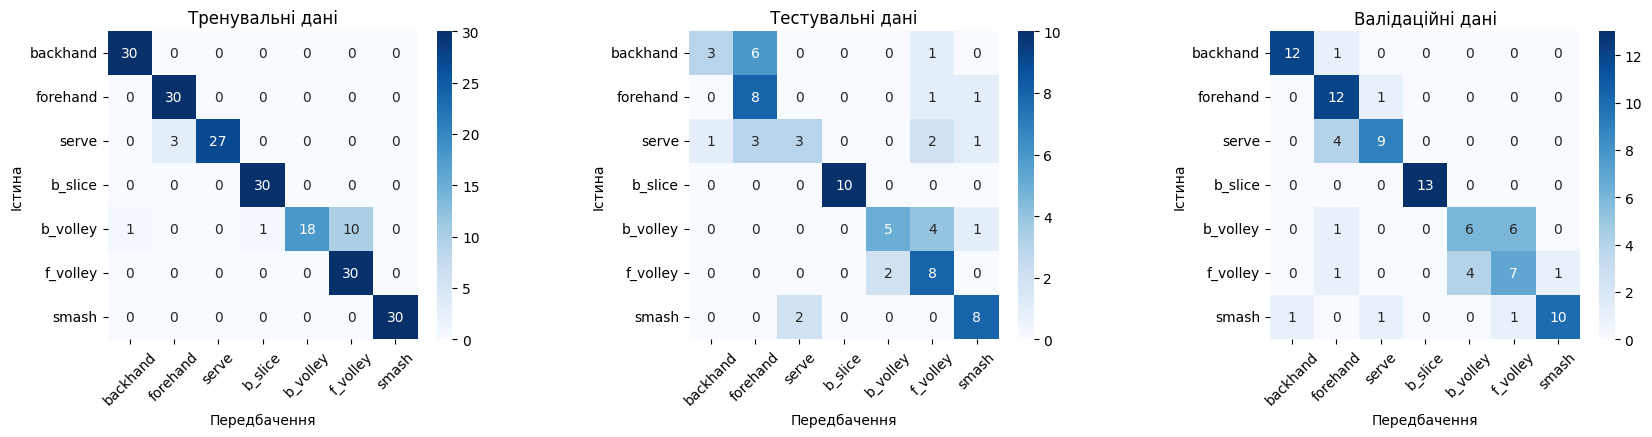

In [ ]:
class_labels = ['backhand', 'forehand', 'serve', 'b_slice', 'b_volley', 'f_volley', 'smash']

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
sns.heatmap(skeleton32_train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тренувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 2)
sns.heatmap(skeleton32_test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тестувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 3)
sns.heatmap(skeleton32_val_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Валідаційні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Обчислення точності для тренувальних та тестових даних
skeleton32_train_accuracy = accuracy_score(skeleton32_train_true_labels, skeleton32_train_predictions)
skeleton32_test_accuracy = accuracy_score(skeleton32_test_true_labels, skeleton32_test_predictions)
skeleton32_val_accuracy = accuracy_score(skeleton32_val_true_labels, skeleton32_val_predictions)

print("Train Accuracy:", skeleton32_train_accuracy)
print("Test Accuracy:", skeleton32_test_accuracy)
print("Val Accuracy:", skeleton32_val_accuracy)

Train Accuracy: 0.9285714285714286
Test Accuracy: 0.6428571428571429
Val Accuracy: 0.7582417582417582


In [ ]:
from sklearn.metrics import precision_score

class_names = {'backhand': 0, 'forehand': 1, 'serve': 2, 'b_slice': 3, 'b_volley': 4, 'f_volley': 5, 'smash': 6}

# Обчислити точність для тренувальних, валідаційних і тестових даних для кожного класу
skeleton32_train_precision = precision_score(skeleton32_train_true_labels, skeleton32_train_predictions, average=None)
skeleton32_val_precision = precision_score(skeleton32_val_true_labels, skeleton32_val_predictions, average=None)
skeleton32_test_precision = precision_score(skeleton32_test_true_labels, skeleton32_test_predictions, average=None)

print("Точність рухів тренувальних даних:")
for class_name, precision in zip(class_names.keys(), skeleton32_train_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів валідаційних даних:")
for class_name, precision in zip(class_names.keys(), skeleton32_val_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів тестових даних:")
for class_name, precision in zip(class_names.keys(), skeleton32_test_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

Точність рухів тренувальних даних:
backhand: 0.9677
forehand: 0.9091
serve   : 1.0000
b_slice : 0.9677
b_volley: 1.0000
f_volley: 0.7500
smash   : 1.0000

Точність рухів валідаційних даних:
backhand: 0.9231
forehand: 0.6316
serve   : 0.8182
b_slice : 1.0000
b_volley: 0.6000
f_volley: 0.5000
smash   : 0.9091

Точність рухів тестових даних:
backhand: 0.7500
forehand: 0.4706
serve   : 0.6000
b_slice : 1.0000
b_volley: 0.7143
f_volley: 0.5000
smash   : 0.7273


In [ ]:
 skeleton32_cnn3d.save('skeleton32_cnn3d.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
